In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


data = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
prices = data['Close'].values.reshape(-1,1)



/tmp/ipython-input-536406068.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(prices)

seq_length = 60
X, y = [], []
for i in range(seq_length, len(scaled_data)):
    X.append(scaled_data[i-seq_length:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)



In [10]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')



/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.fit(X_train, y_train, epochs=20, batch_size=32)


predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))
real = scaler.inverse_transform(y_test.reshape(-1,1))

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.2181
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0139
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0083
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0065
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - loss: 0.0054
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0045
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0045
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0041
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0052
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0046
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0038
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0043
Epoch 13/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0040
Epoch 14/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0036
Epoch 15/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0041
Epoc

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


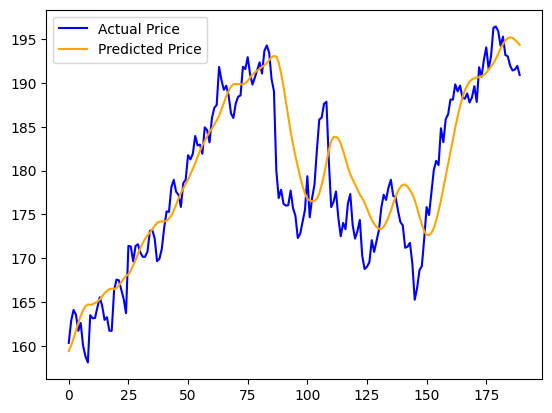

In [15]:

plt.plot(real, color="blue", label="Actual Price")
plt.plot(predictions, color="orange", label="Predicted Price")
plt.legend()
plt.show()